# Task-4: **Exploring Decision Tree Algorithm**

## Objective: *For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if   we feed any new data to this* *classifier, it would be able to predict   the right class accordingly.*  

## Dataset Link: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

## Done By: Rohit Sanam Venkata
                

## IRIS PLANT

In [1]:
from IPython.display import Image
Image("/Users/rohitsanam/Downloads/1200px-Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff (1).jpg")

## Different Iris Species

In [2]:
Image("/Users/rohitsanam/Downloads/1_Hh53mOF4Xy4eORjLilKOwA.png")

## Importing the Necessary Libraries

In [3]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree,export_text
%matplotlib inline

## Checking the current working directory

In [4]:
os.getcwd()

'/Users/rohitsanam/THE SPARKS FOUNDATION TASKS'

## Changing the current working directory to the directory where data resides

In [5]:
os.chdir('/Users/rohitsanam/Downloads')

## Reading the dataset

In [6]:
iris = pd.read_csv('Iris.csv')

## Having a look at the top five rows of the dataset

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Dropping the Id feature

In [8]:
iris.drop('Id',axis=1,inplace=True)

## Checking whether the Id column has been dropped or not

In [9]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Having a look at the pairplot of the data

<Figure size 1080x576 with 0 Axes>

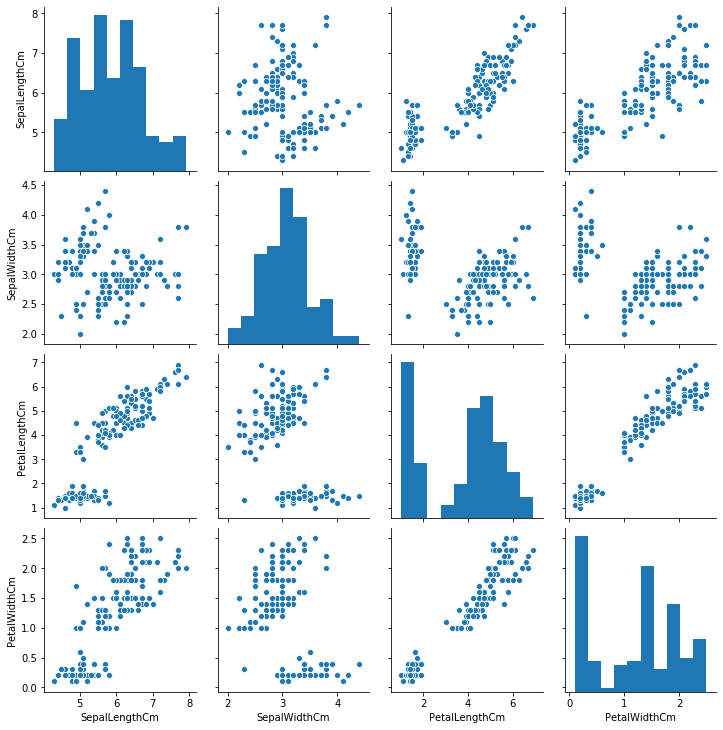

In [10]:
plt.figure(figsize=(15,8))
sns.pairplot(iris)

## Having a look at the unique values of Species column

In [11]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Having a look at the missing values

In [12]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- **From the above output we can see that there are no missing values**

## Representing the missing values graphically

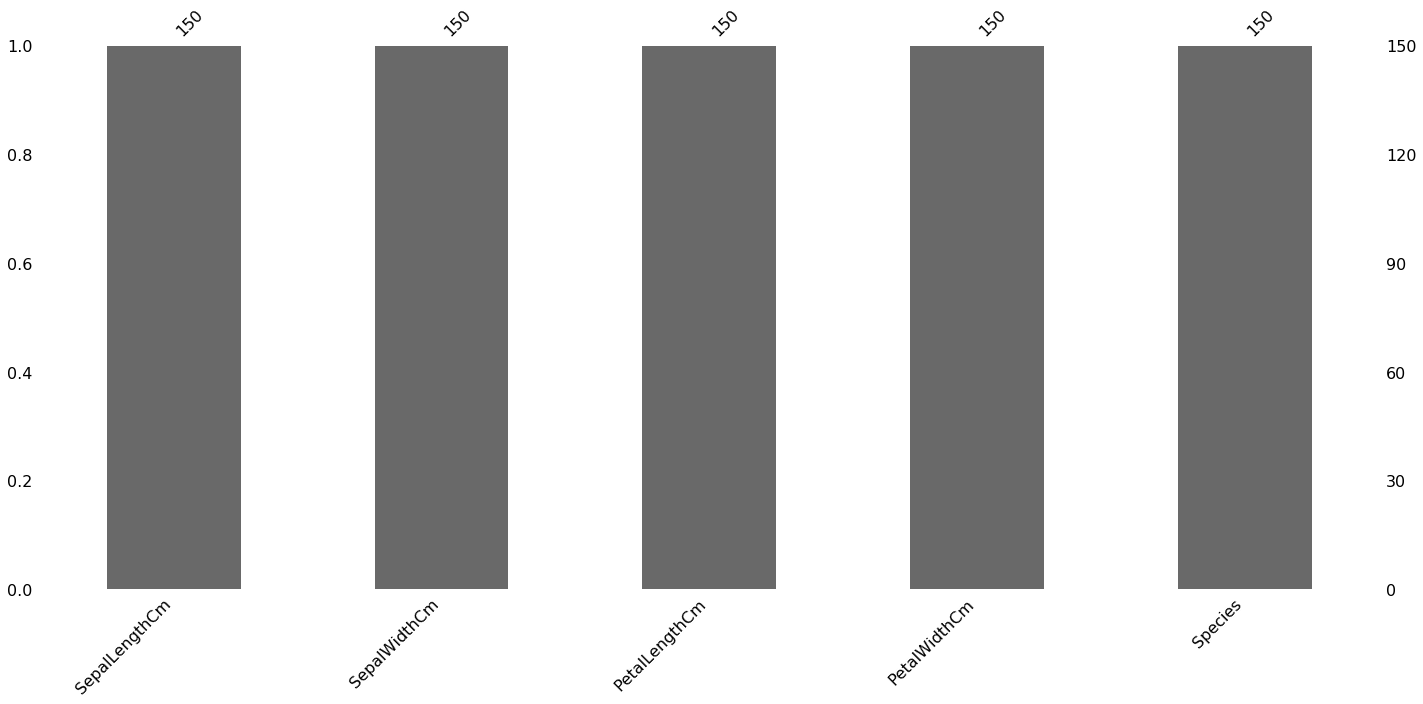

In [13]:
msno.bar(iris)

## Having a look at the type of data each column has

In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Let us have a look at the outliers

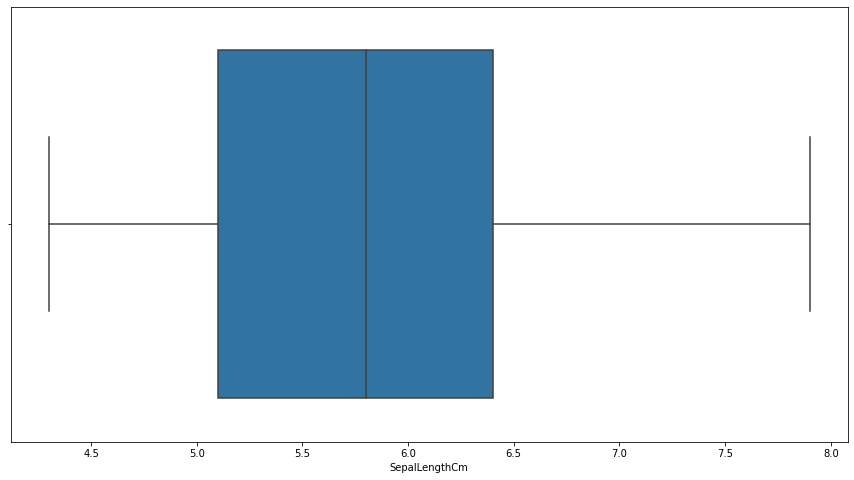

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(iris['SepalLengthCm'])

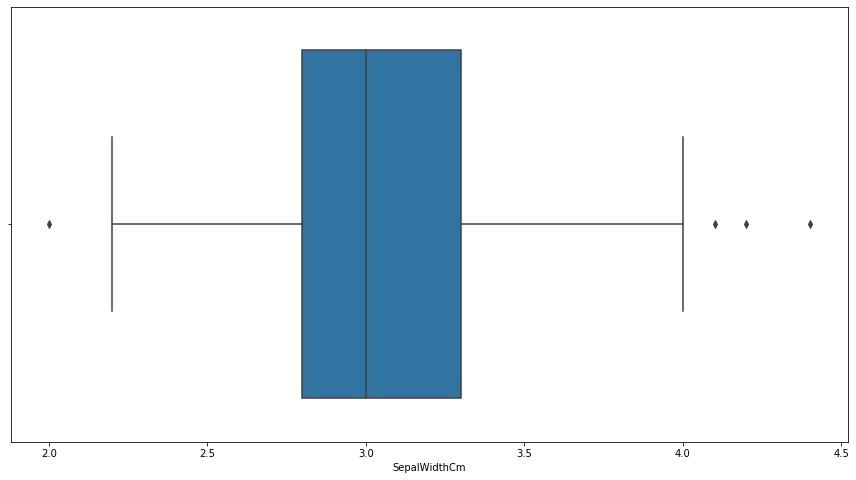

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(iris['SepalWidthCm'])

- **From the above plot we can see that there are some outliers in the SepalWidthCm feature**

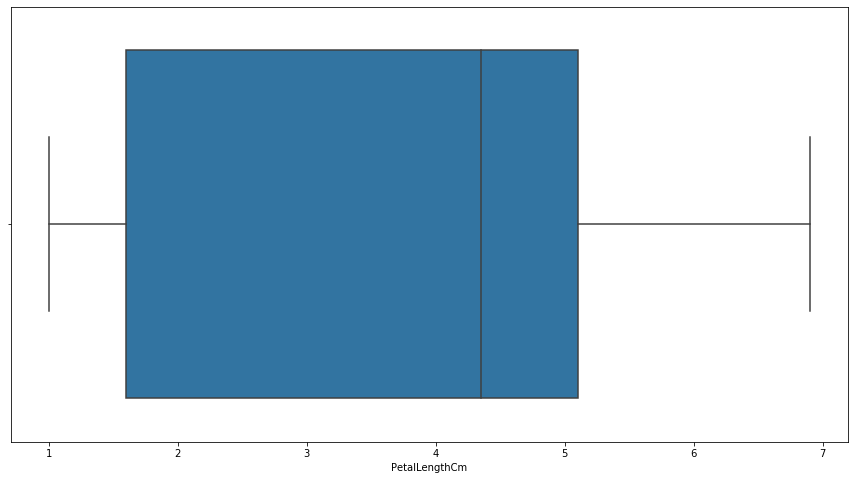

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(iris['PetalLengthCm'])

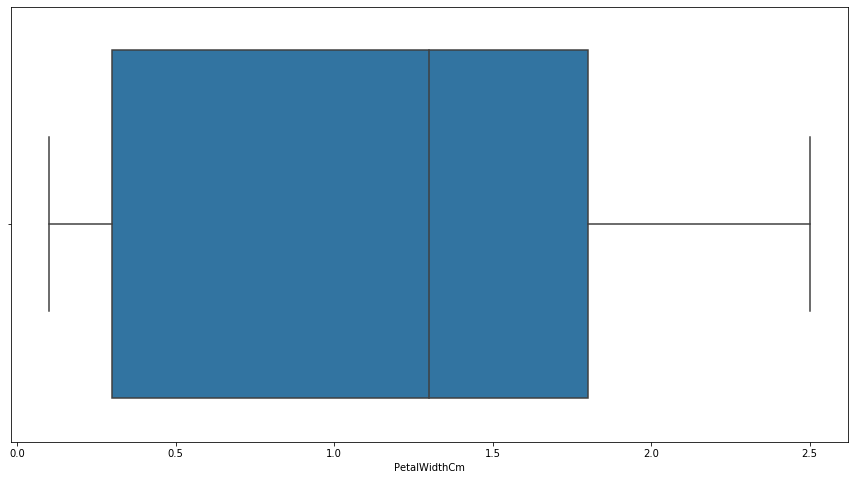

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(iris['PetalWidthCm'])

## Having a look at the summary statistics

In [19]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Having a look at the shape of the data

In [20]:
iris.shape

(150, 5)

- **From the above output we can see that there are 150 rows and 5 columns it is actually 6 with the ID feature after dropping ID its 5**

## Converting the target variable into dummies

In [21]:
def species(x):
    if x['Species']=='Iris-setosa':
        return 0
    elif x['Species']=='Iris-virginica':
        return 1
    else:
        return 2

In [22]:
iris['Species'] = iris.apply(species,axis=1)

## Having a look at the unique values of Species column

In [23]:
iris['Species'].unique()

array([0, 2, 1])

- **From the above output we can see infer the following:**
    - **0 --> Iris-setosa**
    - **1 --> Iris-versicolor**
    - **2 --> Iris-virginica**

## Splitting into X and y

In [24]:
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]

## Let us have a look at X and y

In [25]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

## Let us have a look at the ditribution of the data

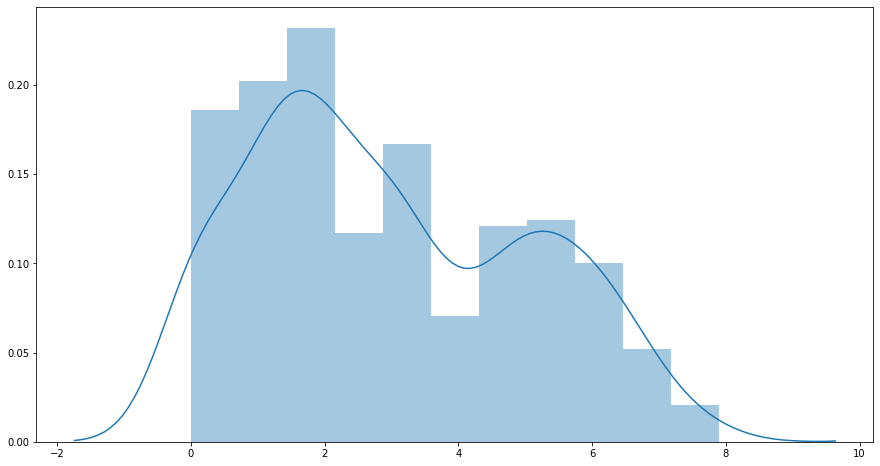

In [27]:
plt.figure(figsize=(15,8))
sns.distplot(iris)

- **From the above plot we can see that the data is normally distributed but it is bimodal in nature**

## Train-Test Split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Having a look at the train and test data

In [29]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [30]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [31]:
y_train.head()

137    1
84     2
27     0
127    1
132    1
Name: Species, dtype: int64

In [32]:
y_test.head()

114    1
62     2
33     0
107    1
7      0
Name: Species, dtype: int64

In [33]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_model = clf.fit(X_train,y_train)
prediction_dt = dt_model.predict(X_test)

In [34]:
dt_model.score(X_test,y_test)

1.0

In [35]:
mod=GridSearchCV(dt_model,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_sc

- **From the above hyperparameter tuning we can see that the max_depth is 3 as per that we have decided the maximum depth**

In [36]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)
dt_model = clf.fit(X_train,y_train)
prediction_dt = dt_model.predict(X_test)

In [37]:
prediction_dt

array([1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2,
       0, 0, 1, 0, 0, 2, 2, 0])

In [38]:
dt_model.score(X_train,y_train)

0.9666666666666667

- **From the above output we can see that previously the model was overfitted and after hyperparameter tuning the accuracy is 96.67%**

[Text(313.875, 475.65000000000003, 'PetalWidthCm <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 44, 37]\nclass = Iris-virginica'),
 Text(209.25, 339.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(418.5, 339.75, 'PetalWidthCm <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 44, 37]\nclass = Iris-virginica'),
 Text(209.25, 203.85000000000002, 'PetalLengthCm <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 4, 36]\nclass = Iris-versicolor'),
 Text(104.625, 67.94999999999999, 'entropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]\nclass = Iris-versicolor'),
 Text(313.875, 67.94999999999999, 'entropy = 0.971\nsamples = 5\nvalue = [0, 3, 2]\nclass = Iris-virginica'),
 Text(627.75, 203.85000000000002, 'PetalLengthCm <= 4.85\nentropy = 0.165\nsamples = 41\nvalue = [0, 40, 1]\nclass = Iris-virginica'),
 Text(523.125, 67.94999999999999, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-virginica'),
 Text(732.375, 67.94999999999999, 'entropy =

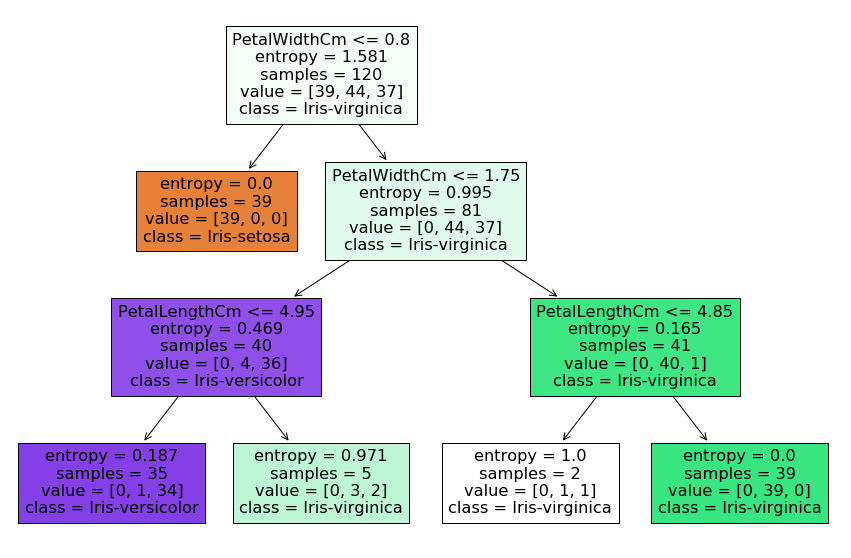

In [39]:
features  = X_test.columns
classes=["Iris-setosa","Iris-virginica","Iris-versicolor"]
plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=features,class_names=classes,filled = True)

# THANK YOU!!!